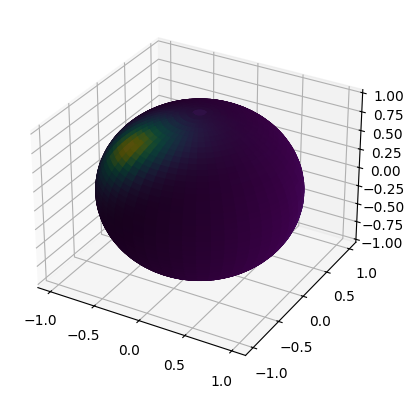

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import special_ortho_group

def bingham_pdf(x, A, B):
    # Bingham distribution PDF at point x given orientation matrix A and diagonal concentration matrix B.
    # Usually, the normalization constant is required, but for visualization, we can ignore it.
    return np.exp(x.T @ A @ B @ A.T @ x)

# Generate a grid of points on a sphere
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 50)
theta, phi = np.meshgrid(theta, phi)
r = 1
x = r * np.sin(phi) * np.cos(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(phi)

# Bingham distribution parameters
# For the orientation matrix, we can use a random orthogonal matrix for demonstration
A = special_ortho_group.rvs(3)
B = np.diag([10, 5, 0])  # Example concentration parameters

# Evaluate the PDF
pdf_values = np.array([bingham_pdf(np.array([x[i, j], y[i, j], z[i, j]]), A, B) for i in range(len(theta)) for j in range(len(theta[0]))])
pdf_values = pdf_values.reshape(theta.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, facecolors=plt.cm.viridis(pdf_values / np.max(pdf_values)))

plt.show()